<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">Transforming Categorical Variables </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we learned in this course.

After completing this notebook, you will need to upload it to the "Submit Your Work and Review Your Peers" section of the Final Project module.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report displaying the accuracy scores.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, tree
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [4]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [5]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [6]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [7]:
df_sydney_processed = df_sydney_processed.astype(float)

In [8]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [9]:
features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Linear Regression


In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.20, random_state = 10)

In [11]:
scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Only the train set is fitted.
x_train[0]

array([-0.01652033, -0.22351516,  3.05624855, -0.3528601 , -1.49917863,
        0.81280282,  0.54686322,  0.63906113,  1.45139438, -0.34685075,
        1.42955371,  1.46816932,  1.45395941,  1.16411721, -0.42868452,
        0.06119933, -1.73381821,  1.73381821, -0.19412228, -0.26363085,
       -0.20951051, -0.09209294, -0.23052136, -0.22306777, -0.12773808,
       -0.151901  , -0.2296003 , -0.14380157,  3.64624217, -0.23417666,
       -0.12773808, -0.88431688, -0.1596252 , -0.20347303, -0.21540659,
       -0.15708867, -0.21050268, -0.18101787, -0.15836152, -0.16702646,
       -0.18325819, -0.1694292 , -0.21540659, -0.17646286, -0.19412228,
       -0.2413554 , -0.13816088,  1.26506823, -0.41667788, -0.17061927,
       -0.48850421, -0.35035237,  2.94769213, -0.13525922, -0.33219954,
       -0.14654687, -0.1077076 , -0.13671719, -0.28615705, -0.26196842,
       -0.28927244, -0.21830526, -0.11475228, -0.25777751, -0.24312407,
       -0.18436945])

In [12]:
LinearReg = LinearRegression().fit(x_train, y_train)

In [13]:
predictions = LinearReg.predict(x_test)

In [14]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

print('Linear Regression Metrics')
print('Mean Absolute Error : {}'.format(LinearRegression_MAE))
print('Mean Squared Error : {}'.format(LinearRegression_MSE))
print('R^2 : {}'.format(LinearRegression_R2))

Linear Regression Metrics
Mean Absolute Error : 0.25631840706878584
Mean Squared Error : 0.11572244138929709
R^2 : 0.42712290666201425


In [15]:
data = {'Linear Regression': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]}

Report = pd.DataFrame(data = data, index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2'])
Report

,Linear Regression
Mean Absolute Error,0.256318
Mean Squared Error,0.115722
R^2,0.427123


### KNN


In [16]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)

In [17]:
predictions = KNN.predict(x_test)

In [18]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

print('KNN Metrics')
print('Accuracy Score : {}'.format(KNN_Accuracy_Score))
print('Jaccard Score : {}'.format(KNN_JaccardIndex))
print('F1 Score : {}'.format(KNN_F1_Score))

KNN Metrics
Accuracy Score : 0.7603053435114504
Jaccard Score : 0.23786407766990292
F1 Score : 0.3843137254901961


### Decision Tree


In [19]:
Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3).fit(x_train, y_train)

In [20]:
predictions = Tree.predict(x_test)

In [21]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

print('Decision Tree Metrics')
print('Accuracy Score : {}'.format(Tree_Accuracy_Score))
print('Jaccard Score : {}'.format(Tree_JaccardIndex))
print('F1 Score : {}'.format(Tree_F1_Score))

Decision Tree Metrics
Accuracy Score : 0.8030534351145038
Jaccard Score : 0.3613861386138614
F1 Score : 0.530909090909091


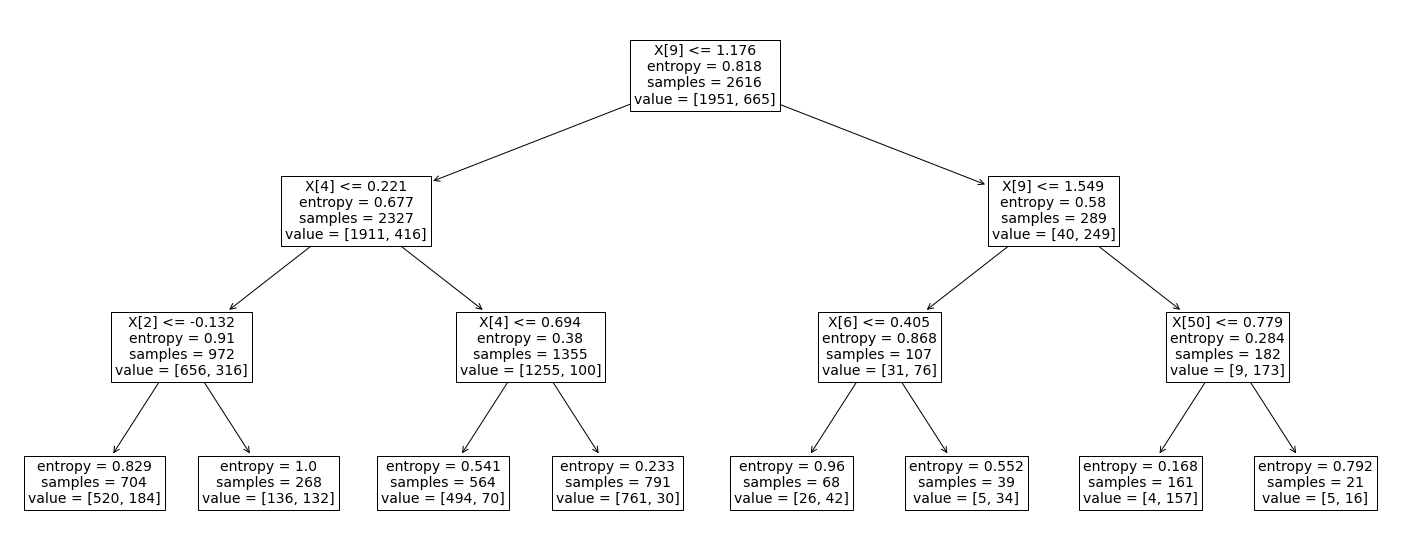

In [22]:
# This is extra.

plt.subplots(figsize = (25, 10))
tree.plot_tree(Tree, fontsize = 14)
plt.show()

### Logistic Regression


In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.20, random_state = 1)

In [24]:
scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Only the train set is fitted.
x_train[0]

array([-0.56212802, -0.74122837,  2.79430008, -0.42623594,  0.0055954 ,
        0.24020191,  1.2761026 , -0.3058901 , -1.05690406, -0.58992255,
        0.90911052,  0.85830957,  0.26708723, -0.08360532, -0.1674044 ,
       -0.52994113, -1.7042528 ,  1.7042528 , -0.20448963, -0.26693271,
        4.89022348, -0.09622504, -0.23957656, -0.22117279, -0.1246112 ,
       -0.13671719, -0.23326711, -0.14654687, -0.27101838, -0.22681919,
       -0.12301982, -0.87952221, -0.16087993, -0.21247547, -0.21540659,
       -0.16702646, -0.2134562 , -0.17988859, -0.15836152, -0.16702646,
       -0.17875308, -0.16459251, -0.22117279,  5.59430928, -0.18875766,
       -0.23778732, -0.12618372, -0.79238755, -0.41604588, -0.17646286,
       -0.48369646, -0.35651141,  2.99111485, -0.13816088, -0.3343235 ,
       -0.14100724, -0.10950919, -0.13816088, -0.28064726, -0.2569332 ,
       -0.30376895, -0.2134562 , -0.11128298, -0.25182262, -0.24663181,
       -0.19199187])

In [25]:
LR = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

In [26]:
predictions = LR.predict(x_test)
predict_proba = LR.predict_proba(x_test)

In [27]:
print(predictions[:10])
predict_proba[:10]

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


array([[0.72941412, 0.27058588],
       [0.9755837 , 0.0244163 ],
       [0.46577673, 0.53422327],
       [0.86899378, 0.13100622],
       [0.97133508, 0.02866492],
       [0.05113738, 0.94886262],
       [0.70075016, 0.29924984],
       [0.96189713, 0.03810287],
       [0.92953591, 0.07046409],
       [0.91182121, 0.08817879]])

In [28]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

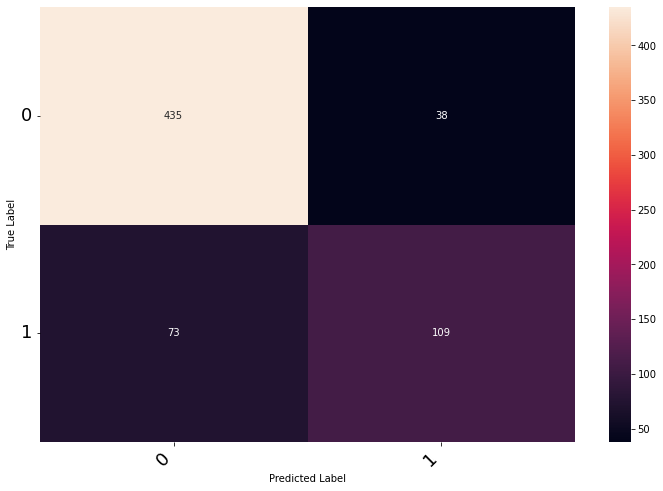

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print_confusion_matrix(confusion_matrix, [0,1])

In [30]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions)
LR_F1_Score = metrics.f1_score(y_test, predictions)
LR_Log_Loss = metrics.log_loss(y_test, predictions)

print('Logistic Regression Metrics')
print('Accuracy Score : {}'.format(LR_Accuracy_Score))
print('Jaccard Score : {}'.format(LR_JaccardIndex))
print('F1 Score : {}'.format(LR_F1_Score))
print('Log Loss : {}'.format(LR_Log_Loss))

Logistic Regression Metrics
Accuracy Score : 0.8305343511450382
Jaccard Score : 0.4954545454545455
F1 Score : 0.6626139817629179
Log Loss : 5.8531825412785246


### SVM


In [31]:
SVM = svm.SVC().fit(x_train, y_train)

In [32]:
predictions = SVM.predict(x_test)

In [33]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)

print('Support Vector Machine Metrics')
print('Accuracy Score : {}'.format(SVM_Accuracy_Score))
print('Jaccard Score : {}'.format(SVM_JaccardIndex))
print('F1 Score : {}'.format(SVM_F1_Score))

Support Vector Machine Metrics
Accuracy Score : 0.8259541984732824
Jaccard Score : 0.45714285714285713
F1 Score : 0.6274509803921569


### Report


In [34]:
data = {'KNN': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, np.nan],
        'Decision Tree': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, np.nan],
        'Logistic Regression': [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss],
        'SVM': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, np.nan]}

Report = pd.DataFrame(data = data, index = ['Accuracy_Score', 'Jaccard_Index', 'F1_Score', 'Log_Loss'])
Report

,KNN,Decision Tree,Logistic Regression,SVM
Accuracy_Score,0.760305,0.803053,0.830534,0.825954
Jaccard_Index,0.237864,0.361386,0.495455,0.457143
F1_Score,0.384314,0.530909,0.662614,0.627451
Log_Loss,NaN,NaN,5.853183,NaN
